## Example Notebook of the Social Thermodynamics Library

This notebook, goes through the main functionality of the Social Thermodynamics Library (STDL).
The library helps to analyse graphs that evolve over time by projecting onto the main layer and subsequently calculating the distances between entities the entities of that layer.

In [21]:
# install packages
#!conda install --yes --file requirements.txt

In [22]:
# import libraries
from STDL import STDC
import pandas as pd

In [23]:
# load example dataset Baboons’ interactions and preprocess
# Data source: http://www.sociopatterns.org/datasets/baboons-interactions/
# Paper: Valeria Gelardi, Jeanne Godard, Dany Paleressompoulle, Nicolas Claidiere, Alain Barrat; Measuring social networks in primates: wearable sensors versus direct observations. Proc. A 1 April 2020; 476 (2236): 20190737. https://doi.org/10.1098/rspa.2019.0737
data = pd.read_csv('example_data/baboons_interactions.txt', sep="	", header=0)
data.columns = ["DateTime", "Actor", "Recipient", "Behavior", "Category", "Duration", "Point"]
data = data.dropna()
data["DateTime"] = pd.to_datetime(data["DateTime"], dayfirst = True)
data = data.reset_index()
data = data.drop(columns=['index', 'Behavior', 'Category', 'Duration', 'Point'])

In [24]:
# initialize class using Baboons dataset
stdc = STDC(raw_data=data, field_names=['Actor', 'Recipient', 'DateTime'], timeframe='%Y-%m-%d')

In [25]:
# inspect data
stdc.raw_data

,DateTime,Actor,Recipient
0,2019-06-13 09:50:00,ANGELE,FELIPE
1,2019-06-13 09:50:00,ANGELE,FELIPE
2,2019-06-13 09:51:00,FELIPE,ANGELE
3,2019-06-13 09:51:00,FELIPE,LIPS
4,2019-06-13 09:51:00,ANGELE,FELIPE
...,...,...,...
3191,2019-07-10 11:02:00,ARIELLE,LIPS
3192,2019-07-10 11:05:00,LIPS,NEKKE
3193,2019-07-10 11:05:00,LIPS,FELIPE
3194,2019-07-10 11:05:00,LIPS,NEKKE


In [26]:
# allocates timeframe bins based on user specified timeframe, in this case, on a daily basis
stdc.calculate_timeframe()

,DateTime,Actor,Recipient,timeframe
0,2019-06-13 09:50:00,ANGELE,FELIPE,2019-06-13
1,2019-06-13 09:50:00,ANGELE,FELIPE,2019-06-13
2,2019-06-13 09:51:00,FELIPE,ANGELE,2019-06-13
3,2019-06-13 09:51:00,FELIPE,LIPS,2019-06-13
4,2019-06-13 09:51:00,ANGELE,FELIPE,2019-06-13
...,...,...,...,...
3190,2019-07-10 11:02:00,LIPS,ARIELLE,2019-07-10
3192,2019-07-10 11:05:00,LIPS,NEKKE,2019-07-10
3193,2019-07-10 11:05:00,LIPS,FELIPE,2019-07-10
3194,2019-07-10 11:05:00,LIPS,NEKKE,2019-07-10


In [27]:
# outputs a biadjacency matrix with unique Baboons of main layer and timeframe as multiindex
stdc.calculate_biadjacency_matrix()

Recipient            ANGELE  ARIELLE  ATMOSPHERE  BOBO  EWINE  EXTERNE  FANA  \
Actor    timeframe                                                             
ANGELE   2019-06-13     0.0      0.0         1.0   1.0    1.0      0.0   0.0   
         2019-06-14     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-06-17     0.0      2.0         0.0   0.0    0.0      0.0   0.0   
         2019-06-18     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-06-19     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
...                     ...      ...         ...   ...    ...      ...   ...   
VIOLETTE 2019-07-04     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-07-05     1.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-07-08     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-07-09     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-07-10     0.0      0.0         0.0   0.0    0.0      0.0   0.0   

Recipient            FELIPE  FEYA  HARLEM  ...  LOME  MAKO  MALI  MALI    \
Actor    timeframe                         ...                             
ANGELE   2019-06-13     8.0   0.0     0.0  ...   3.0   3.0   0.0     0.0   
         2019-06-14     8.0   0.0     0.0  ...   3.0   0.0   0.0     0.0   
         2019-06-17     0.0   2.0     0.0  ...   0.0   3.0   0.0     0.0   
         2019-06-18     2.0   0.0     0.0  ...   0.0   0.0   1.0     0.0   
         2019-06-19     5.0   1.0     0.0  ...   6.0   0.0   0.0     0.0   
...                     ...   ...     ...  ...   ...   ...   ...     ...   
VIOLETTE 2019-07-04     0.0   0.0     1.0  ...   0.0   0.0   0.0     0.0   
         2019-07-05     0.0   0.0     2.0  ...   0.0   0.0   0.0     0.0   
         2019-07-08     0.0   0.0     1.0  ...   0.0   1.0   0.0     0.0   
         2019-07-09     0.0   0.0     0.0  ...   0.0   0.0   2.0     0.0   
         2019-07-10     0.0   0.0     1.0  ...   0.0   0.0   0.0     0.0   

Recipient            MUSE  NEKKE  PETOULETTE  PIPO  SELF  VIOLETTE  
Actor    timeframe                                                  
ANGELE   2019-06-13   0.0    1.0         0.0   0.0   0.0       0.0  
         2019-06-14   0.0    0.0         0.0   0.0   0.0       0.0  
         2019-06-17   0.0    0.0         4.0   0.0   0.0       0.0  
         2019-06-18   2.0    0.0         0.0   0.0   0.0       0.0  
         2019-06-19   0.0    0.0         0.0   0.0   0.0       1.0  
...                   ...    ...         ...   ...   ...       ...  
VIOLETTE 2019-07-04   0.0    0.0         1.0   0.0   0.0       0.0  
         2019-07-05   0.0    1.0         0.0   0.0   0.0       0.0  
         2019-07-08   0.0    0.0         0.0   0.0   0.0       0.0  
         2019-07-09   0.0    0.0         0.0   0.0   0.0       0.0  
         2019-07-10   0.0    0.0         0.0   0.0   0.0       0.0  

[180 rows x 22 columns]

In [28]:
# project onto main layer and calculate positions
stdc.calculate_positions()

Actor                  ANGELE    FELIPE      FEYA      LIPS      LOME  \
Actor    timeframe                                                      
ANGELE   2019-06-13  0.000000  0.682449  0.695003  0.426712  0.734373   
FELIPE   2019-06-13  0.682449  0.000000  0.637857  0.319298  0.507982   
FEYA     2019-06-13  0.695003  0.637857  0.000000  0.797887  1.000000   
LIPS     2019-06-13  0.426712  0.319298  0.797887  0.000000  0.374764   
LOME     2019-06-13  0.734373  0.507982  1.000000  0.374764  0.000000   
...                       ...       ...       ...       ...       ...   
         2019-07-10  1.000000  1.000000  0.533592  0.838310  0.000000   
MUSE     2019-07-10  0.841886  1.000000  0.354990  0.403715  0.837302   
NEKKE    2019-07-10  1.000000  1.000000  0.729710  1.000000  0.045506   
PIPO     2019-07-10  1.000000  1.000000  1.000000  1.000000  1.000000   
VIOLETTE 2019-07-10  1.000000  1.000000  1.000000  1.000000  1.000000   

Actor                    MUSE     NEKKE      PIPO  VIOLETTE  
Actor    timeframe                                           
ANGELE   2019-06-13  0.726346  0.630241  0.593337  0.405245  
FELIPE   2019-06-13  0.384713  0.544700  0.939643  0.854608  
FEYA     2019-06-13  0.949093  0.760526  0.888889  0.923528  
LIPS     2019-06-13  0.379576  0.684185  0.757464  0.554868  
LOME     2019-06-13  0.478613  0.705928  0.883878  0.808190  
...                       ...       ...       ...       ...  
         2019-07-10  0.837302  0.045506  1.000000  1.000000  
MUSE     2019-07-10  0.000000  0.920000  1.000000  1.000000  
NEKKE    2019-07-10  0.920000  0.000000  1.000000  1.000000  
PIPO     2019-07-10  1.000000  1.000000  0.000000  1.000000  
VIOLETTE 2019-07-10  1.000000  1.000000  1.000000  0.000000  

[180 rows x 9 columns]

In [29]:
# initliaze STDC and specify dimensionality of positions
stdc_r = STDC(raw_data=data, field_names=['Actor', 'Recipient', 'DateTime'], timeframe='%Y-%m-%d', dimensions=2)

# calculate dimensionality reduced positions
stdc_r.calculate_reduced_positions()

0         1
Actor    timeframe                     
ANGELE   2019-06-13  0.085340  0.047908
FELIPE   2019-06-13  0.690840 -0.121851
FEYA     2019-06-13 -0.098203  0.481417
LIPS     2019-06-13  0.618714 -0.249877
LOME     2019-06-13  0.535926 -0.325774
...                       ...       ...
         2019-07-10  0.375076  0.113402
MUSE     2019-07-10  0.172659  0.384110
NEKKE    2019-07-10  0.269944  0.035721
PIPO     2019-07-10 -0.987030  0.195610
VIOLETTE 2019-07-10 -0.661774 -0.679543

[180 rows x 2 columns]

In [30]:
# calculate average reduced dimensionality positions between consecutive timeframes
stdc_r.calculate_aligned_reduced_positions()

0         1
Actor    t1         t2                            
ANGELE   2019-06-13 2019-06-14  0.139502  0.168291
         2019-06-14 2019-06-17  0.112336  0.374091
         2019-06-17 2019-06-18 -0.002522  0.498515
         2019-06-18 2019-06-19  0.107630  0.340847
         2019-06-19 2019-06-20  0.162863  0.303271
...                                  ...       ...
VIOLETTE 2019-07-03 2019-07-04 -0.679293 -0.590889
         2019-07-04 2019-07-05 -0.500356 -0.697064
         2019-07-05 2019-07-08 -0.352711 -0.781345
         2019-07-08 2019-07-09 -0.209605 -0.865329
         2019-07-09 2019-07-10 -0.334465 -0.828577

[171 rows x 2 columns]

In [31]:
# calculate graph based on similarities
stdc.calculate_graphs()

{'2019-06-13': <Graph object, undirected, with 9 vertices and 35 edges, 1 internal edge property, at 0x1ac659270>,
 '2019-06-14': <Graph object, undirected, with 9 vertices and 25 edges, 1 internal edge property, at 0x1086c7110>,
 '2019-06-17': <Graph object, undirected, with 9 vertices and 16 edges, 1 internal edge property, at 0x1ac65b070>,
 '2019-06-18': <Graph object, undirected, with 9 vertices and 22 edges, 1 internal edge property, at 0x1ac659630>,
 '2019-06-19': <Graph object, undirected, with 9 vertices and 26 edges, 1 internal edge property, at 0x1ac6596d0>,
 '2019-06-20': <Graph object, undirected, with 9 vertices and 20 edges, 1 internal edge property, at 0x1ac658f50>,
 '2019-06-21': <Graph object, undirected, with 9 vertices and 23 edges, 1 internal edge property, at 0x1ac668410>,
 '2019-06-24': <Graph object, undirected, with 9 vertices and 23 edges, 1 internal edge property, at 0x1ac668e10>,
 '2019-06-25': <Graph object, undirected, with 9 vertices and 26 edges, 1 intern

In [32]:
# calculate communities of graphs
stdc.calculate_communities()

{'2019-06-13': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1ac659270, at 0x1ac73df60>,
 '2019-06-14': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1086c7110, at 0x1ac73def0>,
 '2019-06-17': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1ac65b070, at 0x1ac73e040>,
 '2019-06-18': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1ac659630, at 0x1ac73e120>,
 '2019-06-19': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1ac6596d0, at 0x1ac73e190>,
 '2019-06-20': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1ac658f50, at 0x1ac73e200>,
 '2019-06-21': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1ac668410, at 0x1ac73e270>,
 '2019-06-24': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1ac668e10, at 0x1ac73e2e0>,
 '2019-06-25': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1ac610af0, at 0x1ac73e350>,
 '2019-06-26': <VertexProper

In [33]:
# calculate modularities of communities
stdc.calculate_modularities()

,timeframe,modularity
0,2019-06-13,0.093288
1,2019-06-14,0.146451
2,2019-06-17,0.256814
3,2019-06-18,0.240228
4,2019-06-19,0.114858
5,2019-06-20,0.076981
6,2019-06-21,0.071951
7,2019-06-24,0.134705
8,2019-06-25,0.123625
9,2019-06-26,0.309519


In [34]:
# calculate average between modularities of consecutive timeframes
stdc.calculate_aligned_modularities()

,t1,t2,modularity
0,2019-06-13,2019-06-14,0.119869
1,2019-06-14,2019-06-17,0.201632
2,2019-06-17,2019-06-18,0.248521
3,2019-06-18,2019-06-19,0.177543
4,2019-06-19,2019-06-20,0.095919
5,2019-06-20,2019-06-21,0.074466
6,2019-06-21,2019-06-24,0.103328
7,2019-06-24,2019-06-25,0.129165
8,2019-06-25,2019-06-26,0.216572
9,2019-06-26,2019-06-27,0.284523


In [35]:
# calculated the difference in reduced positions between consecutive timeframes
stdc.calculate_velocities()

Actor                             ANGELE    FELIPE      FEYA      LIPS  \
Actor    t1         t2                                                   
ANGELE   2019-06-13 2019-06-14  0.000000  0.237544  0.246873  0.035008   
         2019-06-14 2019-06-17  0.000000 -0.030089 -0.397718  0.169006   
         2019-06-17 2019-06-18  0.000000  0.050228  0.077878  0.369274   
         2019-06-18 2019-06-19  0.000000 -0.258976  0.282352 -0.451421   
         2019-06-19 2019-06-20  0.000000  0.192856 -0.340823  0.419247   
...                                  ...       ...       ...       ...   
VIOLETTE 2019-07-03 2019-07-04 -0.220193 -0.160128  0.175412 -0.230940   
         2019-07-04 2019-07-05  0.153966 -0.215111 -0.123091  0.230940   
         2019-07-05 2019-07-08  0.066227  0.375239  0.123091 -0.404145   
         2019-07-08 2019-07-09 -0.080845 -0.458831  0.000000  0.404145   
         2019-07-09 2019-07-10  0.080845  0.458831  0.000000  0.000000   

Actor                               LOME      MUSE     NEKKE      PIPO  \
Actor    t1         t2                                                   
ANGELE   2019-06-13 2019-06-14 -0.067736  0.083822  0.369759  0.406663   
         2019-06-14 2019-06-17  0.333363  0.189832 -0.217597  0.000000   
         2019-06-17 2019-06-18 -0.106000  0.000000 -0.175240  0.000000   
         2019-06-18 2019-06-19 -0.336793  0.000000  0.306450  0.000000   
         2019-06-19 2019-06-20  0.039881 -0.267261 -0.026162  0.000000   
...                                  ...       ...       ...       ...   
VIOLETTE 2019-07-03 2019-07-04 -0.135665  0.000000  0.000000 -0.577350   
         2019-07-04 2019-07-05 -0.359769 -0.157135  0.000000  0.577350   
         2019-07-05 2019-07-08  0.005536  0.107808  0.000000 -0.251976   
         2019-07-08 2019-07-09 -0.510102  0.049326 -0.301893  0.251976   
         2019-07-09 2019-07-10  1.000000  0.000000  0.301893  0.000000   

Actor                           VIOLETTE  
Actor    t1         t2                    
ANGELE   2019-06-13 2019-06-14  0.594755  
         2019-06-14 2019-06-17 -0.142134  
         2019-06-17 2019-06-18  0.142134  
         2019-06-18 2019-06-19 -0.102643  
         2019-06-19 2019-06-20  0.102643  
...                                  ...  
VIOLETTE 2019-07-03 2019-07-04  0.000000  
         2019-07-04 2019-07-05  0.000000  
         2019-07-05 2019-07-08  0.000000  
         2019-07-08 2019-07-09  0.000000  
         2019-07-09 2019-07-10  0.000000  

[171 rows x 9 columns]

### Statistics

In [36]:
# calculate_basic_ts_stats() outputs two statistics dataframes
ps, vs = stdc.calculate_basic_ts_stats()

display(ps.head())
display(vs.head())

Actor                    ANGELE                    FELIPE                  \
                           mean       var count      mean       var count   
t1         t2                                                               
2019-06-13 2019-06-14  0.649672  0.073021     9  0.640386  0.093675     9   
2019-06-14 2019-06-17  0.750303  0.096691     9  0.752511  0.093407     9   
2019-06-17 2019-06-18  0.764910  0.102342     9  0.742327  0.088213     9   
2019-06-18 2019-06-19  0.753646  0.091500     9  0.678968  0.082087     9   
2019-06-19 2019-06-20  0.729166  0.090966     9  0.617385  0.085163     9   

Actor                      FEYA                      LIPS  ...  MUSE  \
                           mean       var count      mean  ... count   
t1         t2                                              ...         
2019-06-13 2019-06-14  0.768515  0.087780     9  0.558902  ...     9   
2019-06-14 2019-06-17  0.759909  0.094475     9  0.702338  ...     9   
2019-06-17 2019-06-18  0.738189  0.098583     9  0.753277  ...     9   
2019-06-18 2019-06-19  0.732239  0.084512     9  0.686226  ...     9   
2019-06-19 2019-06-20  0.755550  0.086948     9  0.638083  ...     9   

Actor                     NEKKE                      PIPO                  \
                           mean       var count      mean       var count   
t1         t2                                                               
2019-06-13 2019-06-14  0.681206  0.081580     9  0.750674  0.099501     9   
2019-06-14 2019-06-17  0.722642  0.088582     9  0.860587  0.105921     9   
2019-06-17 2019-06-18  0.695914  0.084981     9  0.882598  0.109774     9   
2019-06-18 2019-06-19  0.776842  0.093886     9  0.862312  0.108119     9   
2019-06-19 2019-06-20  0.756135  0.096027     9  0.868603  0.109743     9   

Actor                  VIOLETTE                  
                           mean       var count  
t1         t2                                    
2019-06-13 2019-06-14  0.677780  0.080137     9  
2019-06-14 2019-06-17  0.771099  0.093632     9  
2019-06-17 2019-06-18  0.807338  0.099300     9  
2019-06-18 2019-06-19  0.795140  0.097720     9  
2019-06-19 2019-06-20  0.807127  0.096716     9  

[5 rows x 27 columns]

Actor                    ANGELE                    FELIPE                  \
                           mean       var count      mean       var count   
t1         t2                                                               
2019-06-13 2019-06-14  0.211854  0.047763     9  0.198272  0.058559     9   
2019-06-14 2019-06-17 -0.010593  0.050169     9  0.025977  0.097704     9   
2019-06-17 2019-06-18  0.039808  0.024105     9 -0.046344  0.046380     9   
2019-06-18 2019-06-19 -0.062337  0.066684     9 -0.080373  0.026743     9   
2019-06-19 2019-06-20  0.013376  0.051469     9 -0.042794  0.087626     9   

Actor                      FEYA                      LIPS  ...  MUSE  \
                           mean       var count      mean  ... count   
t1         t2                                              ...         
2019-06-13 2019-06-14  0.058635  0.033495     9  0.163414  ...     9   
2019-06-14 2019-06-17 -0.075848  0.059146     9  0.123457  ...     9   
2019-06-17 2019-06-18  0.032409  0.057486     9 -0.021579  ...     9   
2019-06-18 2019-06-19 -0.044309  0.052157     9 -0.112524  ...     9   
2019-06-19 2019-06-20  0.090931  0.042865     9  0.016239  ...     9   

Actor                     NEKKE                      PIPO                  \
                           mean       var count      mean       var count   
t1         t2                                                               
2019-06-13 2019-06-14  0.198833  0.021976     9  0.163224  0.033842     9   
2019-06-14 2019-06-17 -0.115962  0.064532     9  0.056603  0.007540     9   
2019-06-17 2019-06-18  0.062506  0.070134     9 -0.012582  0.000944     9   
2019-06-18 2019-06-19  0.099351  0.016821     9 -0.027990  0.016908     9   
2019-06-19 2019-06-20 -0.140764  0.076930     9  0.040572  0.014815     9   

Actor                  VIOLETTE                  
                           mean       var count  
t1         t2                                    
2019-06-13 2019-06-14  0.162312  0.078315     9  
2019-06-14 2019-06-17  0.024326  0.058078     9  
2019-06-17 2019-06-18  0.048152  0.050628     9  
2019-06-18 2019-06-19 -0.072547  0.020214     9  
2019-06-19 2019-06-20  0.096521  0.041533     9  

[5 rows x 27 columns]

In [37]:
# calculates thermodynamic statistics
stdc.calculate_thermodyn_ts_stats()

,,Vol,Temp,V_CoM,Mod,CNT
t1,t2,,,,,
2019-06-13,2019-06-14,0.000015,0.393283,0.490118,0.119869,9.0
2019-06-14,2019-06-17,0.000024,0.635383,0.239282,0.201632,9.0
2019-06-17,2019-06-18,0.000028,0.502332,0.110709,0.248521,9.0
2019-06-18,2019-06-19,0.000021,0.346017,0.241192,0.177543,9.0
2019-06-19,2019-06-20,0.000022,0.586979,0.276591,0.095919,9.0
2019-06-20,2019-06-21,0.000034,0.413486,0.219953,0.074466,9.0
2019-06-21,2019-06-24,0.000019,0.545131,0.260449,0.103328,9.0
2019-06-24,2019-06-25,0.000021,0.403945,0.185727,0.129165,9.0
2019-06-25,2019-06-26,0.000025,0.548355,0.330288,0.216572,9.0


### Visualisations

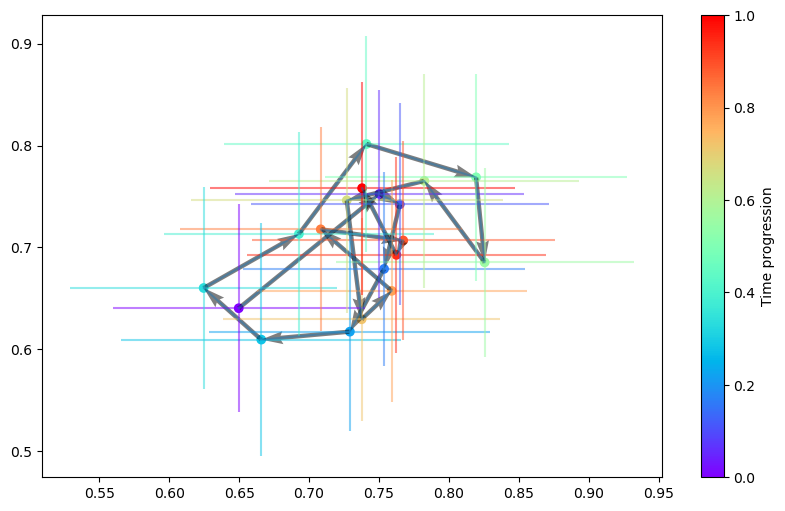

In [38]:
# outputs the trajectory of mean reduced positions along with error
stdc.plot_center_of_mass_trajectory()

In [39]:
# pass labels to track specific Baboons
labels = {
    'ANGELE': 'A',
    'FELIPE': 'F',
    'PIPO': 'P'
}

In [40]:
# evolution of reduced positions over all timeframes
stdc.plot_reduced_positions_animation(labels=labels)